## Agenda
1. Overfitting
2. Regularisation
3. L1 Norm Loss Function
4. L2 Norm Loss Function
5. Lasso
6. Ridge
7. Bias Variance Trade off

## 1. Overfitting

- Complex Decision Boundry  
- Good fit of training data  
- Poor fit of test Data  

<img src="Image/reg.JPG" width="250" />

### Fixing Overfitting
- Regularization Hyperparameter  
- Cross Validation  
- Bias – Variance trade off  

#### Hyper-Parameter
- One which is set manually before learning process begins.  
- Hyper-parameters are data dependent & many times need experiments to find the best  
- GridSearch is used to find the best hyper-parameters  

## 2. Regularisation

- Keep all the features but reduce the magnitude/values of parameter 𝜃.
- Works well when we have a lot of features, each of which contributes a bit to predicting y.
- Penalize Complex models  
- Reduces variance error but increases bias  
- E.g: Lasso, Ridge (Modeling Techniques)  


Suppose we have a equation $ y = \theta_o + \theta_1x + \theta_2x^2 + \theta_3x^3 + \theta_4x^4$  
Chances are there that above equation will overfit the training data.  
  
Intuition:  
If we penalize and make $\theta_3, \theta_4$ very small than effectively above equation will behave like $ y = \theta_o + \theta_1x + \theta_2x^2$ without removing higher polynomial terms.  

Cost Function: $J(\theta) = \frac{1}{2m}[ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{i=1}^n \theta_j^2]$  

$\lambda$ is the regularization parameter. It makes $\theta$ reduce after every iteration.  

<img src="Image/reg.JPG" width="300" />



## 3. L1 Norm Loss Function

Also, known as Snake distance, least absolute deviations (LAD), least absolute errors (LAE)  
Minimize error which is sum of all the absolute differences between the Actual value and The predicted value   

$ L1 Loss Function = \sum_{i=1}^{n} |Y_{actual} - Y_{predict}| $  
- Doesn’t care much about outliers  

Minimising L1 error will tend to produce sol that have:  
- a few residuals that are larger and  
- lots of very insignificant residuals.  
<img src="Image/L3.JPG" width="300" />

In other words, the distribution of residuals will be very "spiky." 
(This is good, for example, when you want to be robust to outliers -- this method "lets" you have a few large residuals (i.e., large errors) while keeping most of the errors small.)




## 4. L2 Norm Loss Function
Minimize error which is sum of all the squared differences between the Actual value and The predicted value   
  

$ L2 Loss Function = \sum_{i=1}^{n} (Y_{actual} - Y_{predict})^2 $  

- Least squares error (LSE)
- Penalize outliers heavily

Minimising L2 residuals will tend to produce sol that have:
- very few big residuals, because they're penalized a lot more,
- but at the cost of having lots more small residuals that are still significant.
  
<img src="Image/L2.JPG" width="300" />



In other words, the distribution of residuals will be far less "spiky" and more "even." (This is good when you have no outliers and you want to keep the overall error small -- it will produce a better "fit.")


## 5. Lasso Regression
- Add penalty for large coefficients  
- Penalty function – L1 norm of regression coefficients  
- Penalty weighted by hyperparameter (alpha)  
- Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Cost Function: RSS + $ \alpha$*(sum of absolute values of coefficients)

RSS = Residual Sum of Squares  
$ \alpha$ is the penalty parameter

$ \alpha (|\theta_0| + |\theta_1|)$


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
auto_data = pd.read_csv('Data/Regression/Detail_Cars.csv')

#Fill missing values with NaN
auto_data = auto_data.replace('?', np.nan)



#Data Cleaning: Convert the values in the price column to numeric values 
#"freq" most common value’s frequency, "top" is the most common value
print(auto_data['price'].describe())
auto_data.select_dtypes(include=["float", 'int'])
#Errors: coerce’, then invalid parsing will be set as NaN
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['bore'] = pd.to_numeric(auto_data['bore'], errors='coerce')
auto_data['stroke'] = pd.to_numeric(auto_data['stroke'], errors='coerce')
auto_data['peak-rpm'] = pd.to_numeric(auto_data['peak-rpm'], errors='coerce')


#Dropping a column which we deem unnecessary
auto_data = auto_data.drop('normalized-losses', axis=1)
cylinders_dict = {'two': 2, 
                  'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)


#### Since there are only 7 unique values, we can explicitly set the corresponding numeric values

In [6]:
#Apply one hot encoding on other non-numeric fields
auto_data = pd.get_dummies(auto_data)
#Drop rows having missing values
auto_data = auto_data.dropna()

X = auto_data.drop('price', axis=1)

# Taking the labels (price)
y = auto_data['price']

#Split the dataset into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Create a LinearRegression model with our training data

In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Check R-square on training data
linear_model.score(X_train, y_train)

0.967922737092433

#### Make predictions on test data

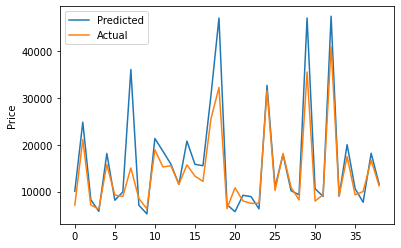

0.6322583416114342


In [8]:
y_predict = linear_model.predict(X_test)

#Draw graph between predicted and actual value
#%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#R-square score
r_square = linear_model.score(X_test, y_test)
print(r_square)

In [18]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


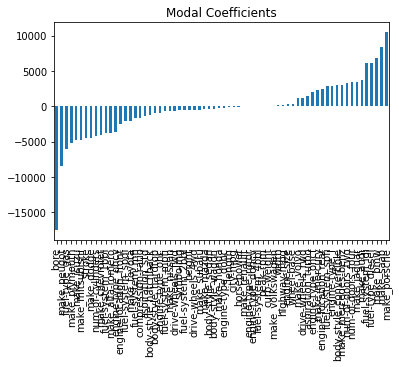

In [19]:
coef.plot(kind='bar', title='Modal Coefficients')

From above plot we can see that value of coefficients of make_saab, make_porshe are much higher compared to others. So, price will be driven by mostly these features.
To overcome this issue, we need to reduce the magnitude of coefficients. For this we have different regression techniques which uses regularization to overcome this issue.

## Lasso

In [42]:
from sklearn.linear_model import Lasso
#higher the alpha, the most feature coefficients are zero.
#alpha is 0, Lasso regression produces the same coefficients as a linear regression
lasso_model = Lasso(alpha=1, normalize=True)
lasso_model.fit(X_train, y_train)
#Check R-sqaure on training data
lasso_model.score(X_train, y_train)

0.9624701682462475

#### Coefficients when using Lasso

In [43]:
predictors = X_train.columns
coef = pd.Series(lasso_model.coef_,predictors).sort_values()


In [21]:
print(coef)

bore                    -9092.176284
make_peugot             -6467.778380
make_jaguar             -6193.545297
engine-location_front   -4537.583890
engine-type_ohcv        -4223.273694
                            ...     
engine-type_l            4268.717784
make_mercedes-benz       4728.694733
make_bmw                 6586.645811
make_saab                6762.816668
make_porsche             7787.668286
Length: 68, dtype: float64


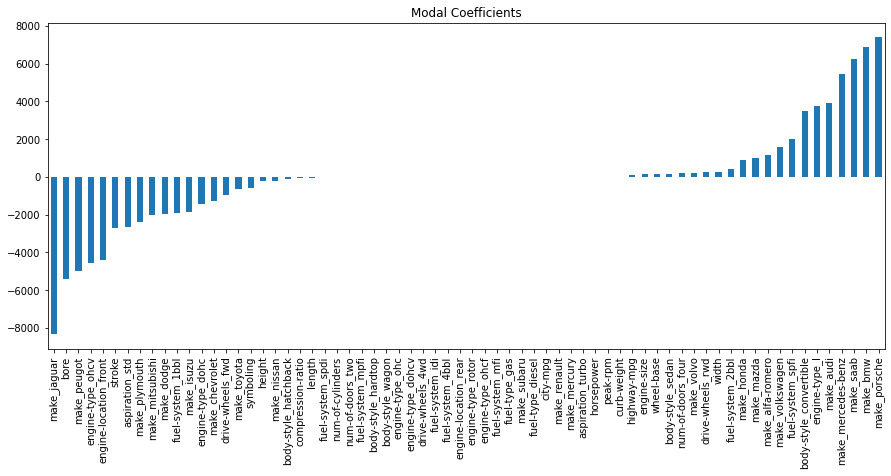

In [44]:
coef.plot(kind='bar', title='Modal Coefficients')

From above plot we can see that value of coefficients of make_bmw, make_saab, make_porshe are much higher compared to others. So, price will be driven by mostly these features.

#### Make predictions on test data

Populating the interactive namespace from numpy and matplotlib


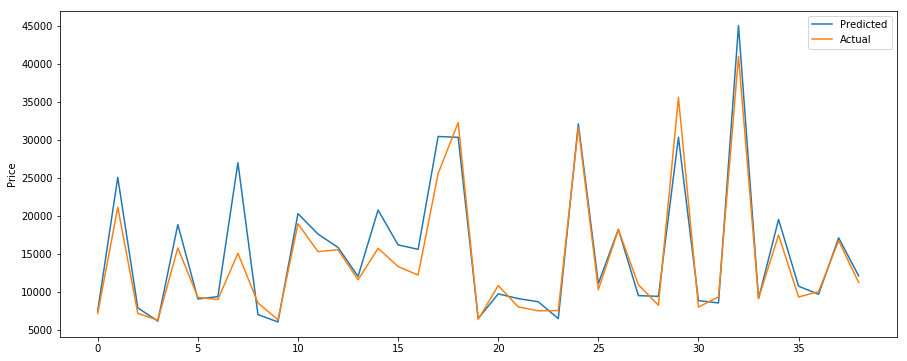

In [20]:
y_predict = lasso_model.predict(X_test)
#Compare predicted and actual values of Price
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Check R-square value on test data

In [21]:
r_square = lasso_model.score(X_test, y_test)
r_square

0.8871949534448482

## 6. Ridge Regression

Cost Function: RSS + $ \alpha$*(sum of squares of coefficients)

RSS = Residual Sum of Squares  
$ \alpha (|\theta_0|^2 + |\theta_1|^2)$


Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Ridge Regression penalizes large coefficients even more than Lasso as coefficients are squared in cost function


In [39]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1, normalize=True)
ridge_model.fit(X_train, y_train)
#Check R-square on training data
ridge_model.score(X_train, y_train)

0.9035839132071651

#### Coefficients when using Ridge

In [40]:
predictors = X_train.columns
coef = pd.Series(ridge_model.coef_,predictors).sort_values()
print(coef.head(5))

engine-location_front   -3531.147655
make_isuzu              -1358.599836
make_peugot             -1051.529371
make_subaru              -979.857360
make_mercury             -897.374786
dtype: float64


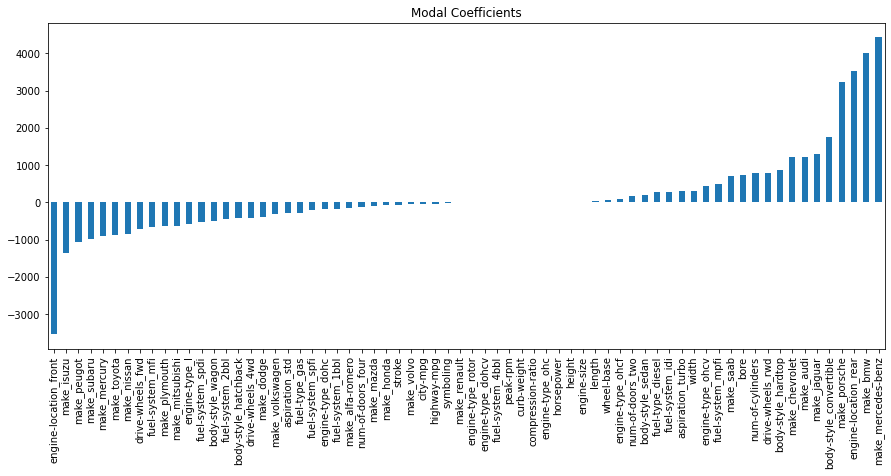

In [41]:
coef.plot(kind='bar', title='Modal Coefficients')

#### Make predictions on test data

Populating the interactive namespace from numpy and matplotlib


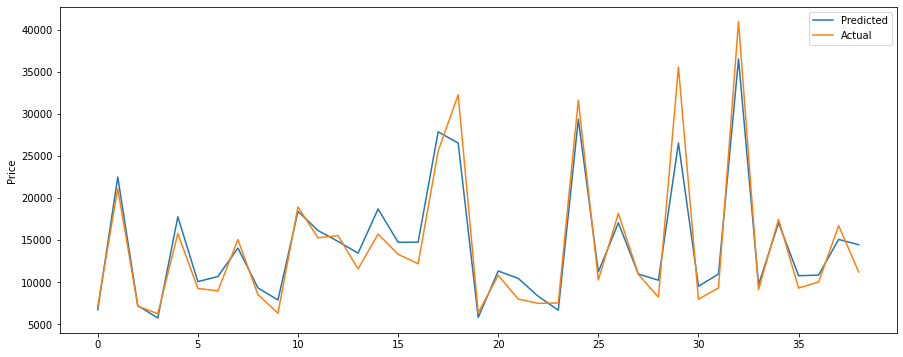

0.9215322460027146

In [35]:
y_predict = ridge_model.predict(X_test)
#Compare predicted and actual values of Price
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()
#Get R-square value for test data
r_square = ridge_model.score(X_test, y_test)
r_square

# 7. Bias Variance Trade off

#### Bias:  
- Assumptions made by a model to make the target function easier to learn
- High Bias means model learnt the training data too well which leads to poor prediction in test set(Underfitting)
- Low Bias: Decision Trees, Simple Vector Machine and k-Nearest Neighbors
- High Bias: Linear Regression, Linear Discriminant Analysis and Logistic Regression

#### Variance:  
- Its the change in the amount of estimate of the target function on changing the training dataset.
- High Variance: large change in estimate of the target function on changing training dataset (Overfitting)
- Low Variance: Linear Regression, Linear Discriminant Analysis and Logistic Regression
- High Variance: Decision Trees, Simple Vector Machine and k-Nearest Neighbors

#### Trade Off
- Goal of Supervised Algorithm is have low bias and low variance
- Linear Models - High Bias and Low Variance
- Non Linear Models - Low Bias and High Variance
- Increasing the bias -> decrease the variance
- Increasing the variance -> decrease the bias
- Parameterization used to balance bias and variance